In [3]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df = pd.read_csv("D:/datasets/Sentiment_dataset.csv")  
print(df.columns)

Index(['news_title', 'reddit_title', 'sentiment', 'text', 'url'], dtype='object')


In [11]:
texts = df['text'].dropna().astype(str).tolist() 

In [13]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    return tokens

tokenized_corpus = [preprocess(sentence) for sentence in texts[:10000]] 

In [15]:
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=5, workers=4)

In [16]:
key_terms = ['data', 'science', 'technology', 'war', 'economy'] 
for word in key_terms:
    if word in model.wv:
        print(f"\nTop 5 words similar to '{word}':")
        for similar_word, score in model.wv.most_similar(word, topn=5):
            print(f"  {similar_word} ({score:.4f})")
    else:
        print(f"'{word}' not in vocabulary.")


Top 5 words similar to 'data':
  regions (0.9824)
  common (0.9819)
  marijuana (0.9799)
  capacity (0.9795)
  stores (0.9788)

Top 5 words similar to 'science':
  combat (0.9897)
  journalism (0.9892)
  flood (0.9888)
  view (0.9868)
  operations (0.9864)

Top 5 words similar to 'technology':
  immune (0.9873)
  basic (0.9805)
  steps (0.9797)
  address (0.9794)
  prevent (0.9793)

Top 5 words similar to 'war':
  museums (0.9900)
  elephant (0.9896)
  lake (0.9883)
  murder (0.9869)
  2008 (0.9866)

Top 5 words similar to 'economy':
  plant (0.9831)
  forests (0.9812)
  planted (0.9806)
  market (0.9799)
  industry (0.9796)


In [30]:
import numpy as np
word_vectors = np.array(word_vectors)

In [32]:
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(word_vectors)

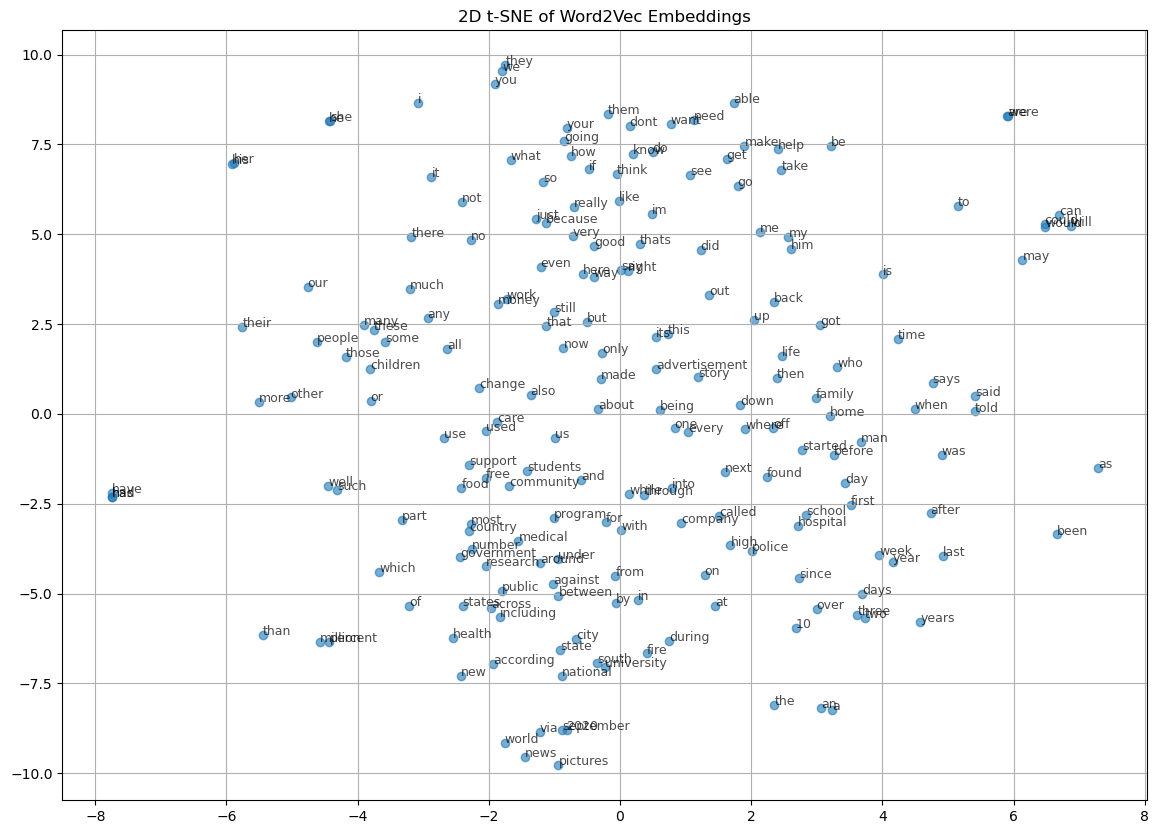

In [34]:
plt.figure(figsize=(14, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)

for i, word in enumerate(words):
    plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=9, alpha=0.7)

plt.title('2D t-SNE of Word2Vec Embeddings')
plt.grid(True)
plt.show()